## Importing the Halo Pipeline
The first line of code is an import statement, it brings in the `HalosSkyPyPipeline` class from the `sim_pipeline.Pipelines.halos_pipeline` module.

For this jupyter notebook, the pipeline is generated from the YAML file, halo.yml. The default setting can be checked in readme.md in the data/Skypy folder.

In [ ]:
from sim_pipeline.Pipelines.halos_pipeline import HalosSkyPyPipeline

pipeline = HalosSkyPyPipeline(sky_area=0.0001,m_max='1.0E+16',m_min='1.0E+12',z_max=5.00)

print(pipeline)

After initializing the pipeline, we can access the `halos` property of the `HalosSkyPyPipeline` instance. The specific output include properties of the halos in certain sky area (here is $ 0.0001\ deg^2$ or $1296\ acrsec^2$) 's light cone such as their redshift, masses.

In [2]:
halos= pipeline.halos
print(halos)

        z                 mass       
------------------ ------------------
 4.265961147715627  1818034527388.819
 4.424171169497191 1578054184616.7449
1.5925758729601645 4220642817397.8145
 4.844538339627916 1111774505315.7068
 4.545299862433597 1136875125522.5227
3.1458450210300026   6295732619150.59
3.8209284776456083 1277381533262.4875
 0.952167154022622  2963688696630.273
 4.797859596977823 1054430208126.1732
1.4012924845552661 3541945598077.6353
               ...                ...
 2.957338103927112 1145501110594.9866
1.7749419965754765 1927651496876.6663
 4.898978347069978 1011945212362.0839
1.6010776048054758  4621866731375.589
 3.770347945334423  2539828557016.738
1.0454135974025371 1047287790703.0922
1.5804856820587088 1205802264719.8408
3.0574296626569453 1459986314503.2004
 1.982985439086954 1037456719890.3654
  4.14267820056786  2519137302068.996
  4.86488746404922  2265287949550.407
Length = 28 rows


## Calculating the convergence and shear
The `HalosLens` class from the `sim_pipeline.halos.halos_lens` module is used to calculate the gravitational lensing effects from the simulated halos. The `HalosLens` class is initialized with the previously generated halos, the sky area, the cosmological parameters, and the number of samples. We then call the `get_convergence_shear` method to calculate the convergence $ \kappa $ and shear $ \gamma_1$, $\gamma_2 $ or shear $\gamma_tot$ at the origin due to all the halos.

In [3]:
# Import HalosLens class from the sim_pipeline.halos module
from sim_pipeline.halos.halos_lens import HalosLens
from astropy.cosmology import FlatLambdaCDM
cosmo = FlatLambdaCDM(H0=70, Om0=0.3)

# Instantiate the HalosLens class with the halo list computed above and a defined sky area
halos_lens = HalosLens(halos_list=halos, sky_area=0.0001,cosmo=cosmo, samples_number= 10000)
# Get the convergence and shear values by calling the get_convergence_shear method
kappa,gamma1,gamma2 = halos_lens.get_convergence_shear(gamma12=True)
print('kappa at center is: ',kappa)
print('gamma1 at center is: ',gamma1)
print('gamma2 at center is: ',gamma2)

kappa at center is:  0.15057317512461932
gamma1 at center is:  0.01036455683466253
gamma2 at center is:  0.04997102552660587


C:\Users\TXZ27\AppData\Local\Programs\Python\Python310\lib\site-packages\numba\core\decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)


### We can also get the lists of kappa and gamma values over the certain sky area by calling the `get_kappa_gamma_distib` method. To set `gamma_tot=True`, we can get the lists of `[kappa,gamma_tot]` with a length of `samples_number`

In [4]:
kappa_gamma_distribution = halos_lens.get_kappa_gamma_distib(gamma_tot=True, diff=None)
print(kappa_gamma_distribution)

For this halos list, elapsed time for computing weak-lensing maps: 37.615713357925415 seconds
[[0.11593437 0.0432069 ]
 [0.16885523 0.06846818]
 [0.11329503 0.03042129]
 ...
 [0.12491878 0.04393444]
 [0.18267909 0.07768888]
 [0.14487203 0.10668103]]


### We visualize the distributions of the modified kappa and gamma values using histograms.
The variable `modified_kappa_halos` is calculated by subtracting the mean of the kappa values (`mean_kappa`) from each individual kappa value in `kappa_values_halos`. modified_kappa_halos = kappa_values_halos - mean_kappa

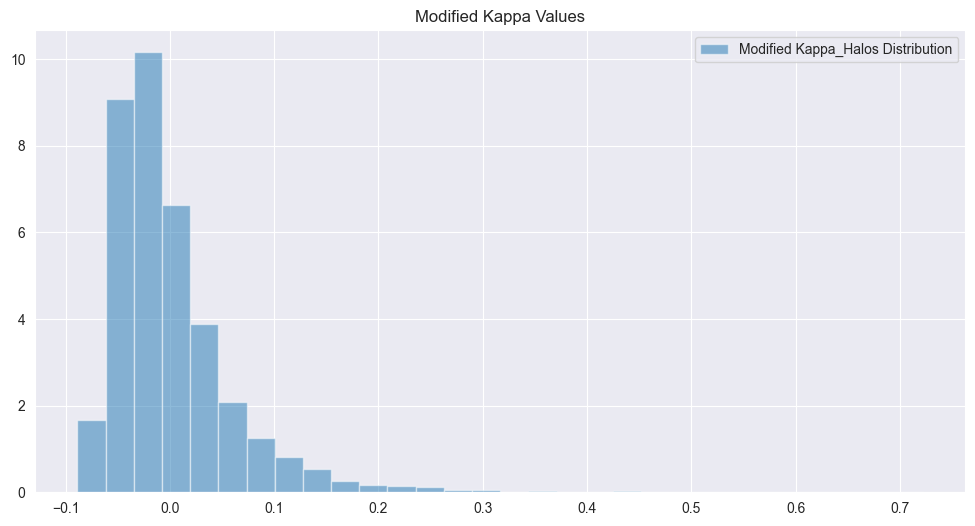

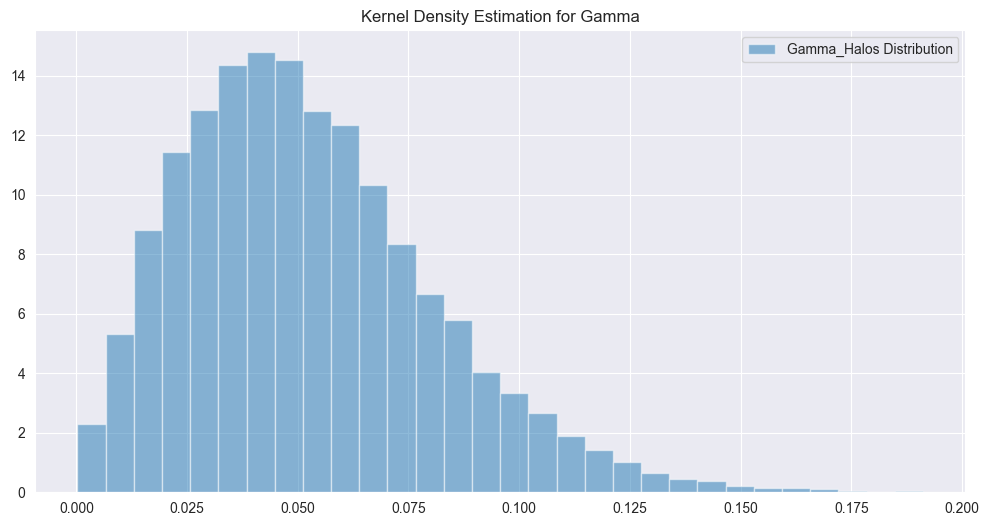

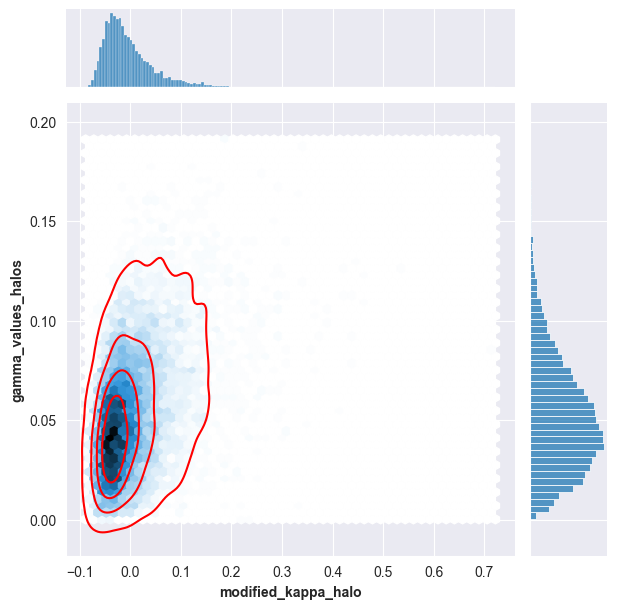

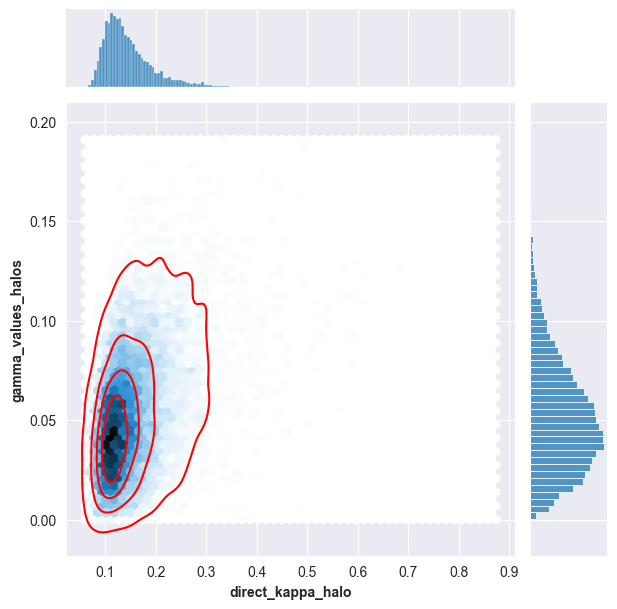

Spearman correlation coefficient:  0.3672441214395429
Kendall Tau correlation coefficient:  0.2500631088115122


In [5]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
kappa_gamma_distribution = np.array(kappa_gamma_distribution)  # Convert list of lists to numpy array
kappa_values_halos = kappa_gamma_distribution[:, 0]  # Get the first column of each row
gamma_values_halos = kappa_gamma_distribution[:, 1]  # Get the first column of each row

mean_kappa = np.mean(kappa_values_halos)

modified_kappa_halos = kappa_values_halos - mean_kappa

plt.figure(figsize=(12, 6))
plt.hist(modified_kappa_halos, bins=30, density=True, alpha=0.5, label='Modified Kappa_Halos Distribution')
plt.title('Modified Kappa Values')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.hist(gamma_values_halos, bins=30, density=True, alpha=0.5, label='Gamma_Halos Distribution')
plt.title(f'Kernel Density Estimation for Gamma')
plt.legend()
plt.show()

import seaborn as sns
modified_plot = sns.jointplot(x=modified_kappa_halos, y=gamma_values_halos,kind='hex')
modified_plot.plot_joint(sns.kdeplot, color="r", zorder=3, levels=5)
modified_plot.ax_joint.set_xlabel('modified_kappa_halo', fontweight='bold')
modified_plot.ax_joint.set_ylabel('gamma_values_halos', fontweight='bold')
plt.show()

unmodified_plot = sns.jointplot(x=kappa_values_halos, y=gamma_values_halos,kind='hex')
unmodified_plot.plot_joint(sns.kdeplot, color="r", zorder=3, levels=5)
unmodified_plot.ax_joint.set_xlabel('direct_kappa_halo', fontweight='bold')
unmodified_plot.ax_joint.set_ylabel('gamma_values_halos', fontweight='bold')
plt.show()

from scipy.stats import spearmanr, kendalltau
print('Spearman correlation coefficient: ', spearmanr(modified_kappa_halos, gamma_values_halos)[0])
print('Kendall Tau correlation coefficient: ', kendalltau(modified_kappa_halos, gamma_values_halos)[0])

Finally, we use a Gaussian Kernel Density Estimation (KDE) to generate a random sample of kappa and gamma values based on the existing distributions. The joint distribution of these random kappa and gamma values is plotted using seaborn's `jointplot` function.

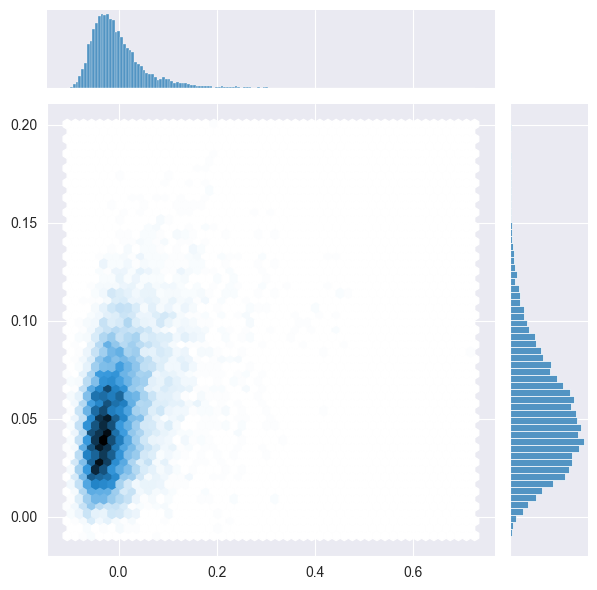

In [6]:
import seaborn as sns
kernel = stats.gaussian_kde(np.vstack([modified_kappa_halos, gamma_values_halos]))
n = 10000  # Number of random numbers to generate
kappa_random_halos, gamma_random_halos = kernel.resample(n)
sns.jointplot(x=kappa_random_halos, y=gamma_random_halos, kind='hex')
plt.show()

# Run the method ` run_halos_without_kde()` to obtain kappa and gamma values without using KDE.

 This will generate ` n_iterations` sets of halo lists under the specified `sky_area`.
 For each set, it will simulate `samples_number` times to get the kappa and gamma values
 at the origin. The obtained values will be directly appended without any additional processing.

In [9]:
from sim_pipeline.halos.halos_plus_glass import run_halos_without_kde
from astropy.cosmology import FlatLambdaCDM
import matplotlib.pyplot as plt
import warnings
from numba.core.errors import NumbaDeprecationWarning

warnings.simplefilter('ignore', NumbaDeprecationWarning)

nk,ng = run_halos_without_kde(n_iterations=20, sky_area=0.0001, samples_number=10,cosmo=FlatLambdaCDM(H0=70, Om0=0.3),                                         m_min=None, m_max=None, z_max=None)


The 20 halo-lists took 158.69334769248962 seconds to run
The 20 halo-lists took 184.94061541557312 seconds to run


Visualization of ` run_halos_without_kde()`

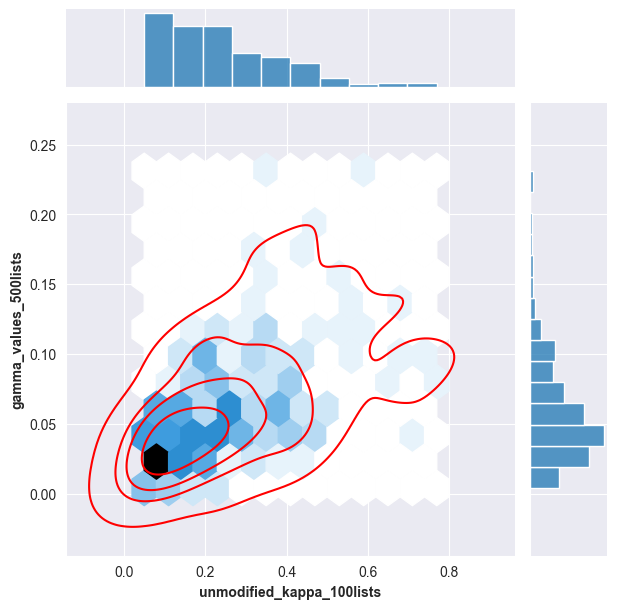

Spearman correlation coefficient:  0.5634725868146704
Kendall Tau correlation coefficient:  0.3903517587939698


In [8]:
import seaborn as sns
from scipy.stats import spearmanr, kendalltau
modified_plot = sns.jointplot(x=nk, y=ng,kind='hex')
modified_plot.plot_joint(sns.kdeplot, color="r", zorder=3, levels=5)
modified_plot.ax_joint.set_xlabel('unmodified_kappa_100lists', fontweight='bold')
modified_plot.ax_joint.set_ylabel('gamma_values_500lists', fontweight='bold')
plt.show()
print('Spearman correlation coefficient: ', spearmanr(nk, ng)[0])
print('Kendall Tau correlation coefficient: ', kendalltau(nk, ng)[0])